In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Training.csv")

In [3]:
test = pd.read_csv("Testing.csv")

In [4]:
train.drop("Unnamed: 133",axis=1,inplace=True)

In [5]:
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [6]:
test.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
le.fit(train["prognosis"])

LabelEncoder()

In [10]:
X_train = train.drop("prognosis",axis=1).values
y_train = le.transform(train["prognosis"])

In [11]:
X_test = test.drop("prognosis",axis=1).values
y_test = le.transform(test["prognosis"])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

In [13]:
model = Sequential()

In [14]:
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(41,activation="softmax"))

In [15]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
earlystop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [18]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[earlystop])

Epoch 1/100
154/154 [==============================] - 1s 3ms/step - loss: 2.5034 - accuracy: 0.3530 - val_loss: 0.2967 - val_accuracy: 0.9762
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.8352 - val_loss: 0.0773 - val_accuracy: 0.9762
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.9136 - val_loss: 0.0614 - val_accuracy: 0.9762
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9362 - val_loss: 0.0891 - val_accuracy: 0.9762
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.1521 - accuracy: 0.9522 - val_loss: 0.0548 - val_accuracy: 0.9762
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.9632 - val_loss: 0.0843 - val_accuracy: 0.9762
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9738 - val_loss: 0.0548 - val_accuracy: 0.9762

Text(0.5, 1.0, 'Train and Validation')

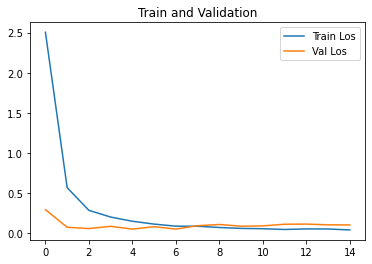

In [19]:
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']

plt.plot(range(15),loss,label='Train Los')
plt.plot(range(15),val_loss,label='Val Los')
plt.legend(loc='upper right')
plt.title('Train and Validation')

In [20]:
model.save("trainedModel.h5")